In [27]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup

In [28]:
df = pd.read_csv("./data/QueryResults.csv")
df.head()

Title  \
0                                   Pan & Zoom Image   
1                  Is a bool read/write atomic in C#   
2   What is the advantage of storing schema in avro?   
3  How do you get JavaScript/jQuery Intellisense ...   
4  XmlSerializer - There was an error reflecting ...   

                                                Body  \
0  <p>I want to create a simple image viewer in W...   
1  <p>Is accessing a <strong>bool</strong> field ...   
2  <p>We need to serialize some data for putting ...   
3  <p>I thought jQuery Intellisense was supposed ...   
4  <p>Using C# .NET 2.0, I have a composite data ...   

                                                Tags        Id  Score  \
0                      <c#><wpf><xaml><zooming><pan>    741956    142   
1          <c#><.net><concurrency><locking><boolean>     59422     93   
2                 <java><apache><hadoop><solr><avro>  20556324     30   
3  <asp.net><javascript><jquery><visual-studio><i...     59766     93   
4           <c#><.net><xml><serialization><.net-2.0>     60573    359   

   ViewCount  FavoriteCount  AnswerCount  
0     149315             97           12  
1      64069             13            4  
2      25174             13            3  
3      10076             41            9  
4     260995             29           19

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27370 entries, 0 to 27369
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27370 non-null  object
 1   Body           27370 non-null  object
 2   Tags           27370 non-null  object
 3   Id             27370 non-null  int64 
 4   Score          27370 non-null  int64 
 5   ViewCount      27370 non-null  int64 
 6   FavoriteCount  27370 non-null  int64 
 7   AnswerCount    27370 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


In [30]:
# Check duplicate
def check_duplicate(df, target):
    return bool(sum(df[target].duplicated()))

check_duplicate(df,'Title')

False

In [31]:
# PREPROCESSING
def cleaner(x):
    """
    Clean the text
    """
    # remove tags
    soup = BeautifulSoup(x)
    #strip and replace
    return soup.get_text().strip().replace("\n", " ")

def tagger(x):
    """
    Prepare the tags
    """
    x = re.sub('<|>', ' ', x).split()
    
    for d, i in enumerate(x) :
        # Remove punctuations
        i = re.sub(',\.|-', "", i)
        
        # remove numbers
        i = re.sub(r"\d+", "", i)
        # normalisation
        x[d] = i.lower().strip()
        
    return list(set([i for i in x if i.isalnum()]))

df["Tags"] = df["Tags"].apply(tagger) # Enlever les ponctuations et les nombres
df["Body"] = df['Body'].apply(cleaner)
df["Body"].head(), df["Tags"].head()

(0    I want to create a simple image viewer in WPF ...
 1    Is accessing a bool field atomic in C#? In par...
 2    We need to serialize some data for putting int...
 3    I thought jQuery Intellisense was supposed to ...
 4    Using C# .NET 2.0, I have a composite data cla...
 Name: Body, dtype: object,
 0                           [wpf, xaml, zooming, pan]
 1                     [concurrency, locking, boolean]
 2                  [avro, java, apache, hadoop, solr]
 3    [intellisense, jquery, visualstudio, javascript]
 4                                [xml, serialization]
 Name: Tags, dtype: object)

In [32]:
TAGS_DISPLAY = df["Tags"].values.tolist()

In [ ]:
# MERGE TEXT COLUMNS and remove useless one :
df["full_text"] = df["Title"].astype(str) +"\n"+ df["Body"].astype(str)
df = df.drop(columns=['Title', 'Body', 'Id', 'Score', 'ViewCount', 'FavoriteCount', "AnswerCount"])

In [ ]:
# One hot encode the data :
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

data = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('Tags')),
                index=df.index,
                columns=mlb.classes_))
data

full_text  aac  aadhaar  aapt  \
0      Pan & Zoom Image\nI want to create a simple im...    0        0     0   
1      Is a bool read/write atomic in C#\nIs accessin...    0        0     0   
2      What is the advantage of storing schema in avr...    0        0     0   
3      How do you get JavaScript/jQuery Intellisense ...    0        0     0   
4      XmlSerializer - There was an error reflecting ...    0        0     0   
...                                                  ...  ...      ...   ...   
27365  How to map numeric data into categories / bins...    0        0     0   
27366  Override S3 endpoint using Boto3 configuration...    0        0     0   
27367  Is there any way to convert ZoneId to ZoneOffs...    0        0     0   
27368  iOS 9 Splash screen is black\nMy apps' splash ...    0        0     0   
27369  The resource could not be loaded because the A...    0        0     0   

       aar  abac  abaddressbook  abap  abbreviation  abc  ...  zpl  zplii  \
0        0     0              0     0             0    0  ...    0      0   
1        0     0              0     0             0    0  ...    0      0   
2        0     0              0     0             0    0  ...    0      0   
3        0     0              0     0             0    0  ...    0      0   
4        0     0              0     0             0    0  ...    0      0   
...    ...   ...            ...   ...           ...  ...  ...  ...    ...   
27365    0     0              0     0             0    0  ...    0      0   
27366    0     0              0     0             0    0  ...    0      0   
27367    0     0              0     0             0    0  ...    0      0   
27368    0     0              0     0             0    0  ...    0      0   
27369    0     0              0     0             0    0  ...    0      0   

       zsh  zshcompletion  zshrc  zsi  zstack  zune  zurbfoundation  zxing  
0        0              0      0    0       0     0               0      0  
1        0              0      0    0       0     0               0      0  
2        0              0      0    0       0     0               0      0  
3        0              0      0    0       0     0               0      0  
4        0              0      0    0       0     0               0      0  
...    ...            ...    ...  ...     ...   ...             ...    ...  
27365    0              0      0    0       0     0               0      0  
27366    0              0      0    0       0     0               0      0  
27367    0              0      0    0       0     0               0      0  
27368    0              0      0    0       0     0               0      0  
27369    0              0      0    0       0     0               0      0  

[27370 rows x 11554 columns]

In [ ]:
from tqdm.notebook import tqdm
# Calculating number of comments in each category
## Enlever les labels avec une seule apparitions pour l'évaluation / train / test
categories = list(data.columns.values)
categories = categories[1:]
i = 0
for category in tqdm(categories):
    if data[category].sum() == 1:
        data.pop(category)
        i+=1
        continue
print(f"Il y a {i} catégories qui ont été supprimées")

  0%|          | 0/11553 [00:00<?, ?it/s]

Il y a 4867 catégories qui ont été supprimées


OSError: Cannot save file into a non-existent directory: '/data'

In [ ]:
data.to_csv("./data/cleaned_data.csv", index = False)

# Analyse

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv("./data/cleaned_data.csv")
data_raw.head()

full_text  aac  aapt  aar  \
0  Pan & Zoom Image\nI want to create a simple im...    0     0    0   
1  Is a bool read/write atomic in C#\nIs accessin...    0     0    0   
2  What is the advantage of storing schema in avr...    0     0    0   
3  How do you get JavaScript/jQuery Intellisense ...    0     0    0   
4  XmlSerializer - There was an error reflecting ...    0     0    0   

   abaddressbook  abi  abort  absolutepath  absolutevalue  abstract  ...  \
0              0    0      0             0              0         0  ...   
1              0    0      0             0              0         0  ...   
2              0    0      0             0              0         0  ...   
3              0    0      0             0              0         0  ...   
4              0    0      0             0              0         0  ...   

   zooming  zorder  zpl  zplii  zsh  zshcompletion  zshrc  zsi  \
0        1       0    0      0    0              0      0    0   
1        0       0    0      0    0              0      0    0   
2        0       0    0      0    0              0      0    0   
3        0       0    0      0    0              0      0    0   
4        0       0    0      0    0              0      0    0   

   zurbfoundation  zxing  
0               0      0  
1               0      0  
2               0      0  
3               0      0  
4               0      0  

[5 rows x 6687 columns]

In [3]:
6687 * 0.05

334.35

In [4]:
# TODO: Word2Vec :: Glove - Fastext
def get_top_n(dataframe, top_n):
    """
    Get the top n of the created 
    """
    categories = list(dataframe.columns.values)[1:]
    df_stats = pd.DataFrame([(category, dataframe[category].sum()) for category in categories], columns=['category', 'number of queries'])
    df_stats.sort_values(by=['number of queries'], ascending = False, inplace=True)
    
    top_ = df_stats['category'][:top_n].tolist()
    df_top = dataframe[['full_text'] + top_]
    
    # Remove raws without labels
    df_top = df_top[(df_top[top_].T != 0).any()]
    df_top = df_top.reset_index(drop=True)
    return df_top, top_

In [5]:
df, label_cols = get_top_n(data_raw, 35)
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20587 entries, 0 to 20586
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   full_text       20587 non-null  object
 1   java            20587 non-null  int64 
 2   python          20587 non-null  int64 
 3   javascript      20587 non-null  int64 
 4   ios             20587 non-null  int64 
 5   android         20587 non-null  int64 
 6   iphone          20587 non-null  int64 
 7   objectivec      20587 non-null  int64 
 8   html            20587 non-null  int64 
 9   jquery          20587 non-null  int64 
 10  php             20587 non-null  int64 
 11  c               20587 non-null  int64 
 12  linux           20587 non-null  int64 
 13  css             20587 non-null  int64 
 14  xcode           20587 non-null  int64 
 15  performance     20587 non-null  int64 
 16  swift           20587 non-null  int64 
 17  sql             20587 non-null  int64 
 18  window

(                                           full_text  java  python  \
 0  What is the advantage of storing schema in avr...     1       0   
 1  How do you get JavaScript/jQuery Intellisense ...     0       0   
 2  How can you find and replace text in a file us...     0       0   
 3  How can I prevent SQL injection in PHP?\nIf us...     0       0   
 4  Mocking Static Blocks in Java\nMy motto for Ja...     1       0   
 
    javascript  ios  android  iphone  objectivec  html  jquery  ...  \
 0           0    0        0       0           0     0       0  ...   
 1           1    0        0       0           0     0       1  ...   
 2           0    0        0       0           0     0       0  ...   
 3           0    0        0       0           0     0       0  ...   
 4           0    0        0       0           0     0       0  ...   
 
    multithreading  string  database  arrays  sqlserver  macos  git  bash  \
 0               0       0         0       0          0      0    0

/home/jupyter/.cache/pypoetry/virtualenvs/openclassroom-KKh1tyRT-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


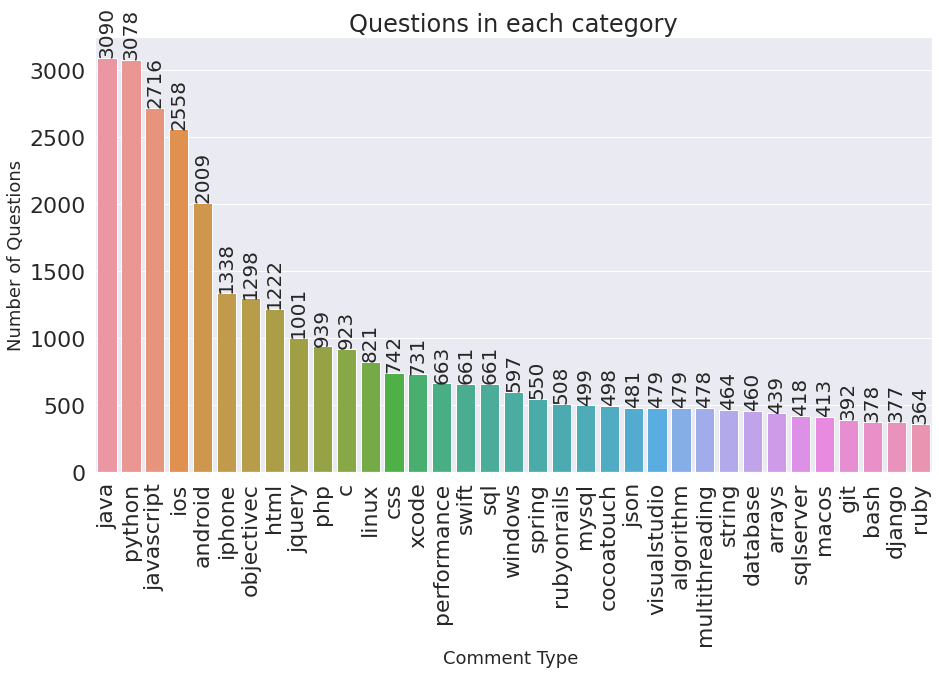

In [34]:
categories = list(df.columns.values)[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, df.iloc[:,1:].sum().values)

plt.title("Questions in each category", fontsize=24)
plt.ylabel('Number of Questions', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
plt.xticks(rotation = 90)
#adding the text labels
rects = ax.patches
labels = df.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', rotation='vertical', fontsize='small')
    
plt.show()

/home/jupyter/.cache/pypoetry/virtualenvs/openclassroom-KKh1tyRT-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


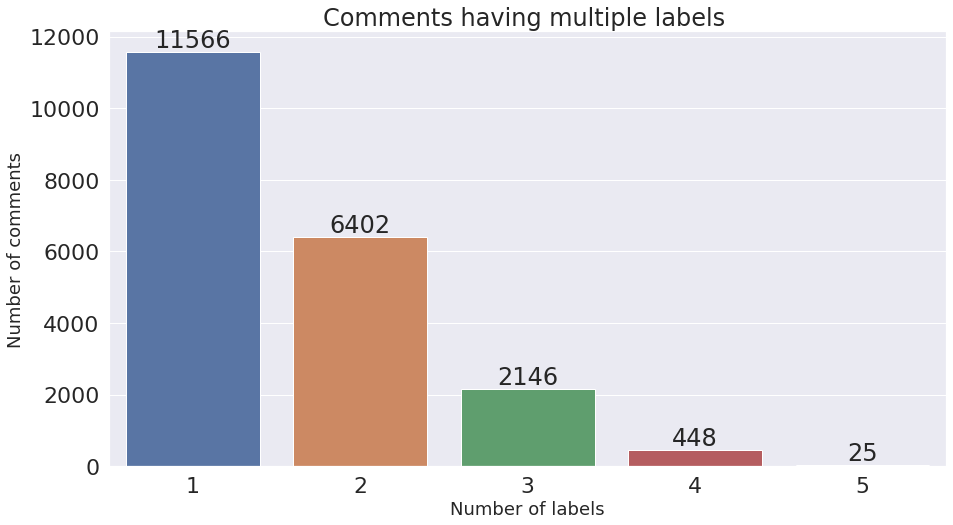

In [36]:
rowSums = df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Number of labels by question ")
plt.ylabel('Number of question', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

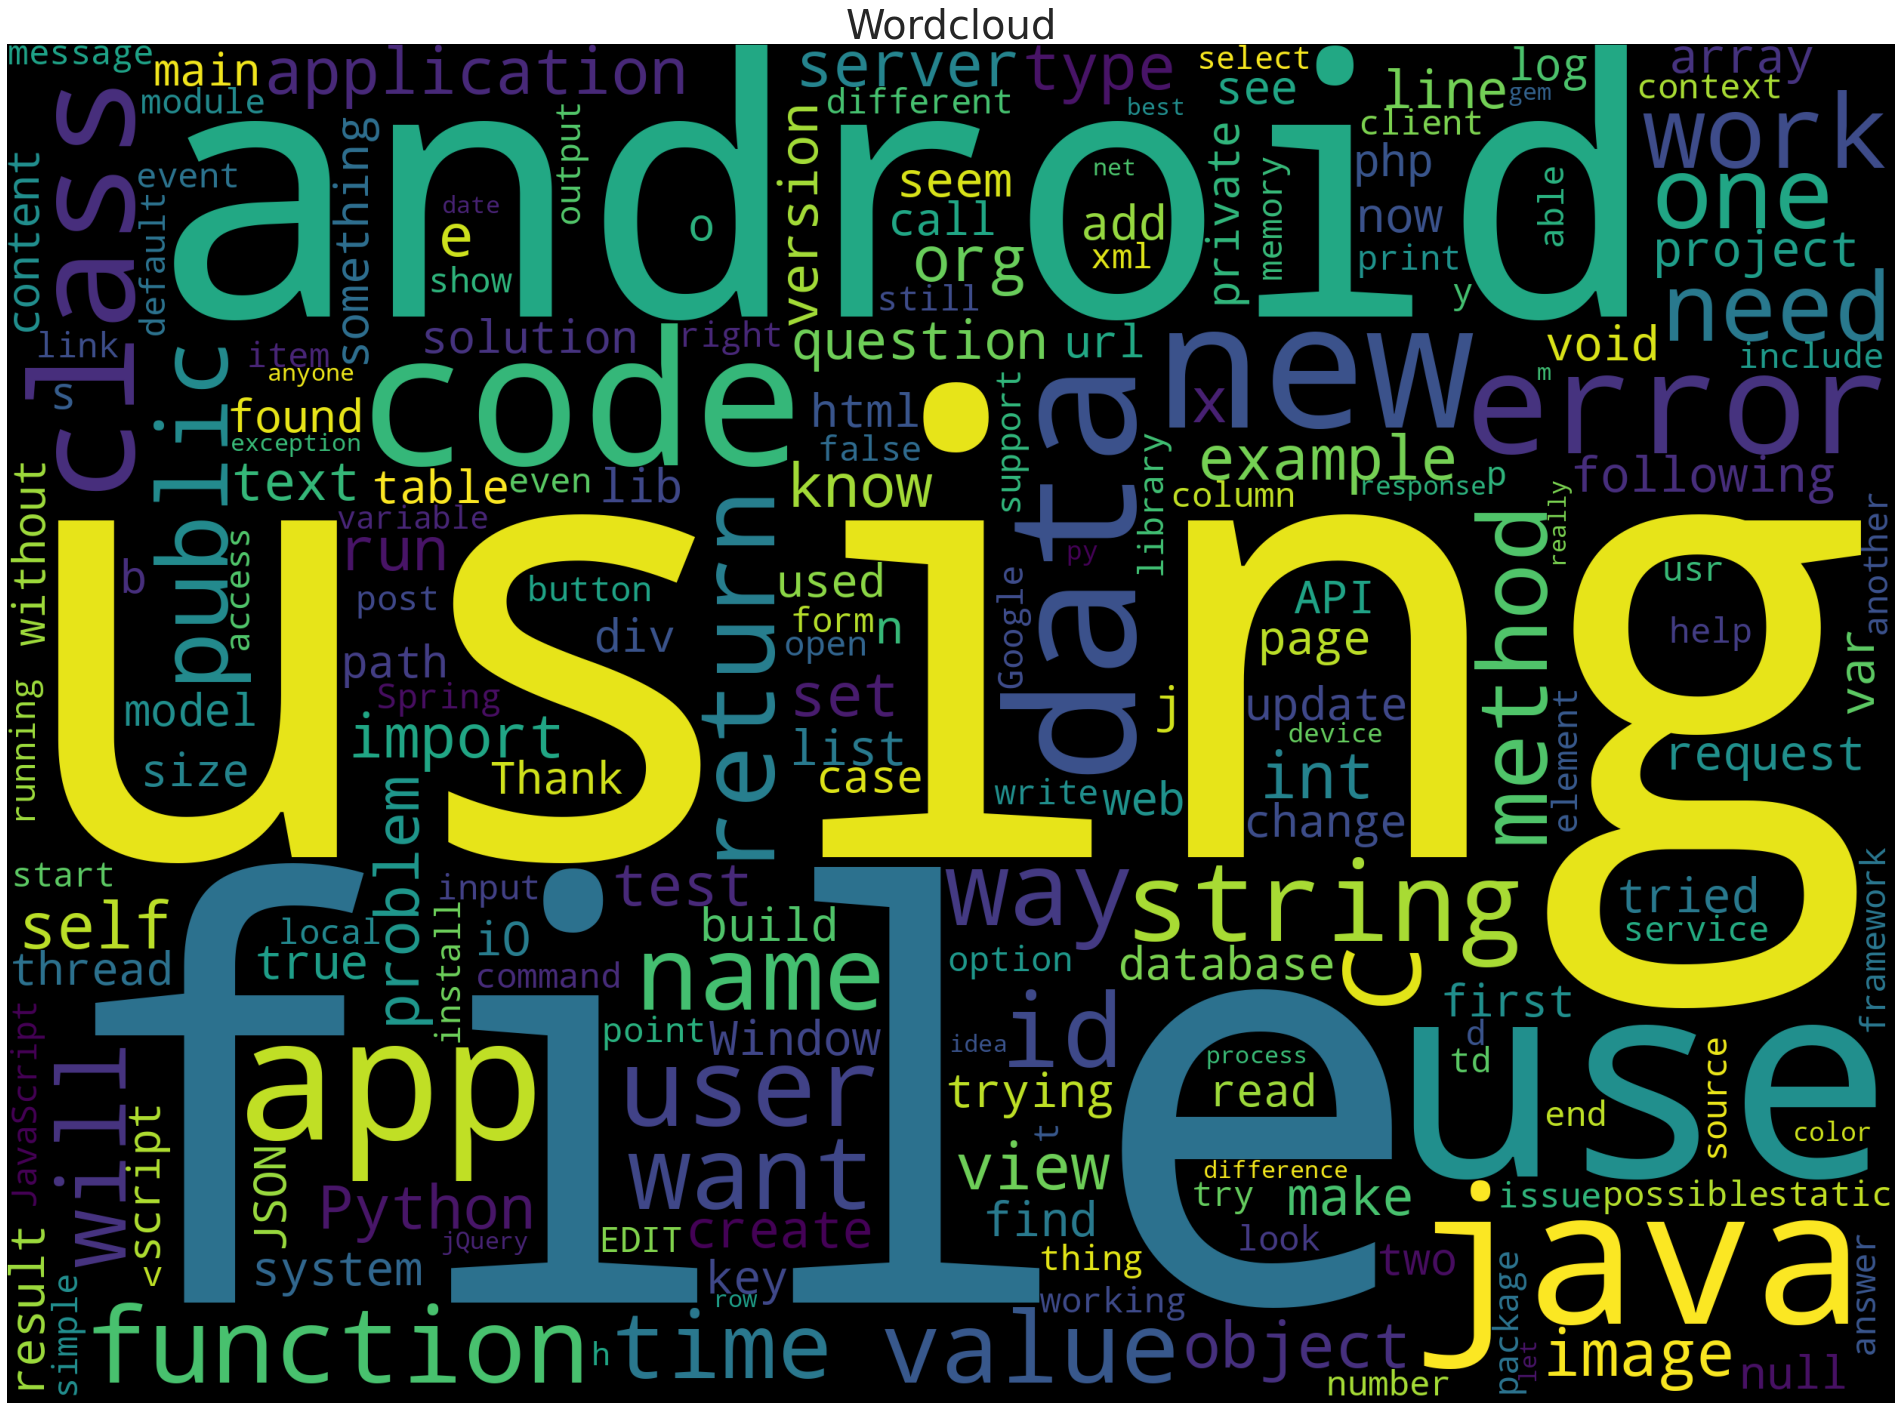

In [39]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
text = df.full_text.values

cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Wordcloud",fontsize=40)
plt.imshow(cloud_toxic)

In [6]:
# Embeddings
from sentence_transformers import SentenceTransformer

model_use = SentenceTransformer("distiluse-base-multilingual-cased")


def embed(sentences):
    """
    wrapper function for generating message embeddings
    """
    embeddings = model_use.encode(sentences)
    return embeddings

2022-08-28 16:01:08.317907: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-28 16:01:08.317966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
%%time
questions_embeddings = embed(df.full_text.tolist()[:1000])

CPU times: user 2min 41s, sys: 3.44 s, total: 2min 44s
Wall time: 41.2 s


In [33]:
labels = TAGS_DISPLAY[:1000]

In [35]:
import itertools

In [39]:
vocab = list(set(itertools.chain.from_iterable(labels)))
vocab2idx = {w:k for k,w in enumerate(vocab)}

In [42]:
test = [['aidl', 'piano'], ['ddl', 'click']]

for t in test: 
    print(sum([vocab2idx[i] for i in t]))

5
29


In [ ]:
import umap
standard_embedding = umap.UMAP(random_state=42).fit_transform(questions_embeddings)

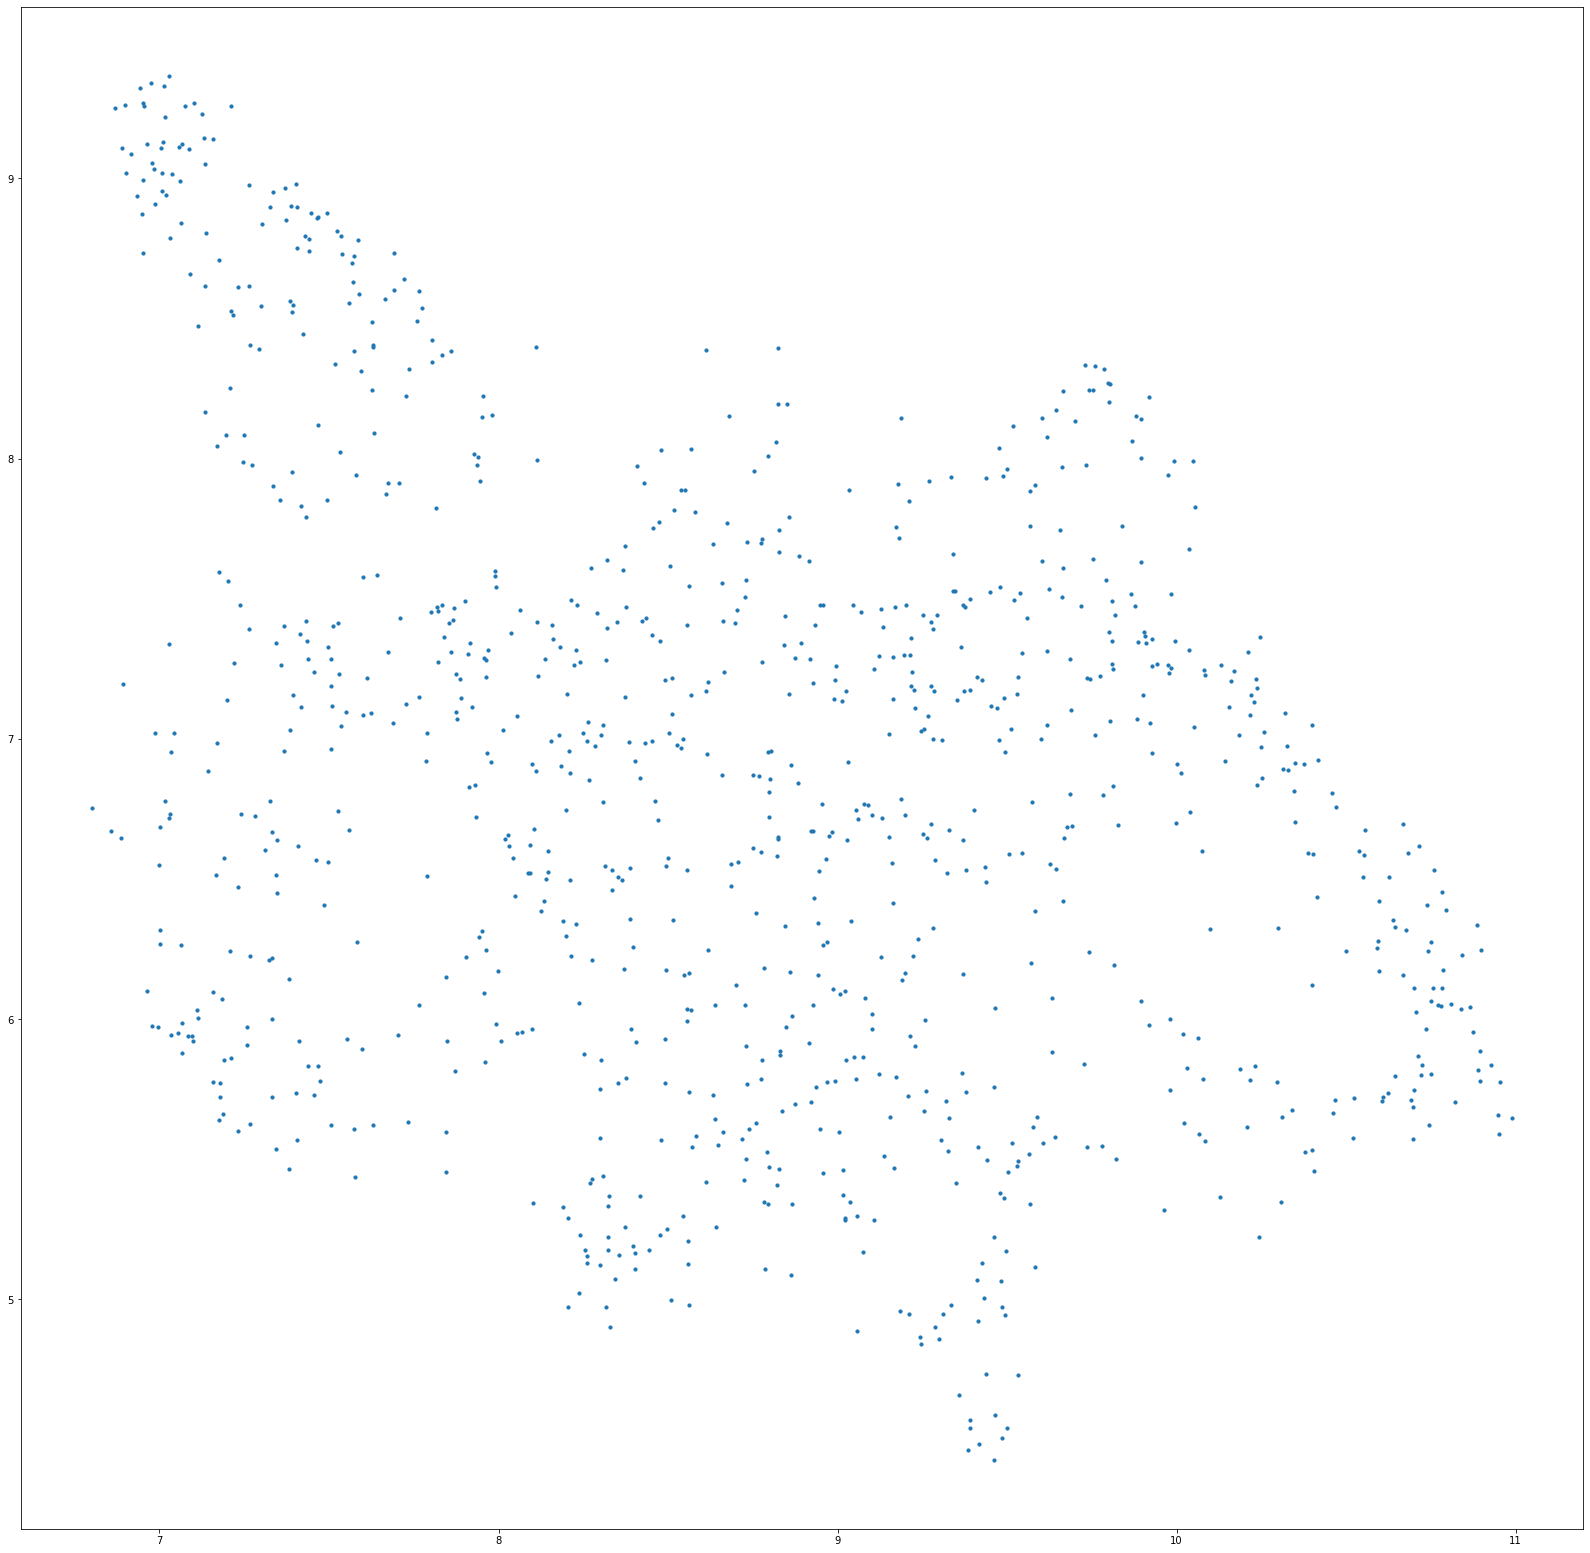

In [43]:
plt. figure(figsize=(28, 28))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=10, cmap='Spectral');

In [25]:
import plotly.express as px # for data visualization

standard_embedding = umap.UMAP(n_components=3, random_state=42).fit_transform(questions_embeddings)


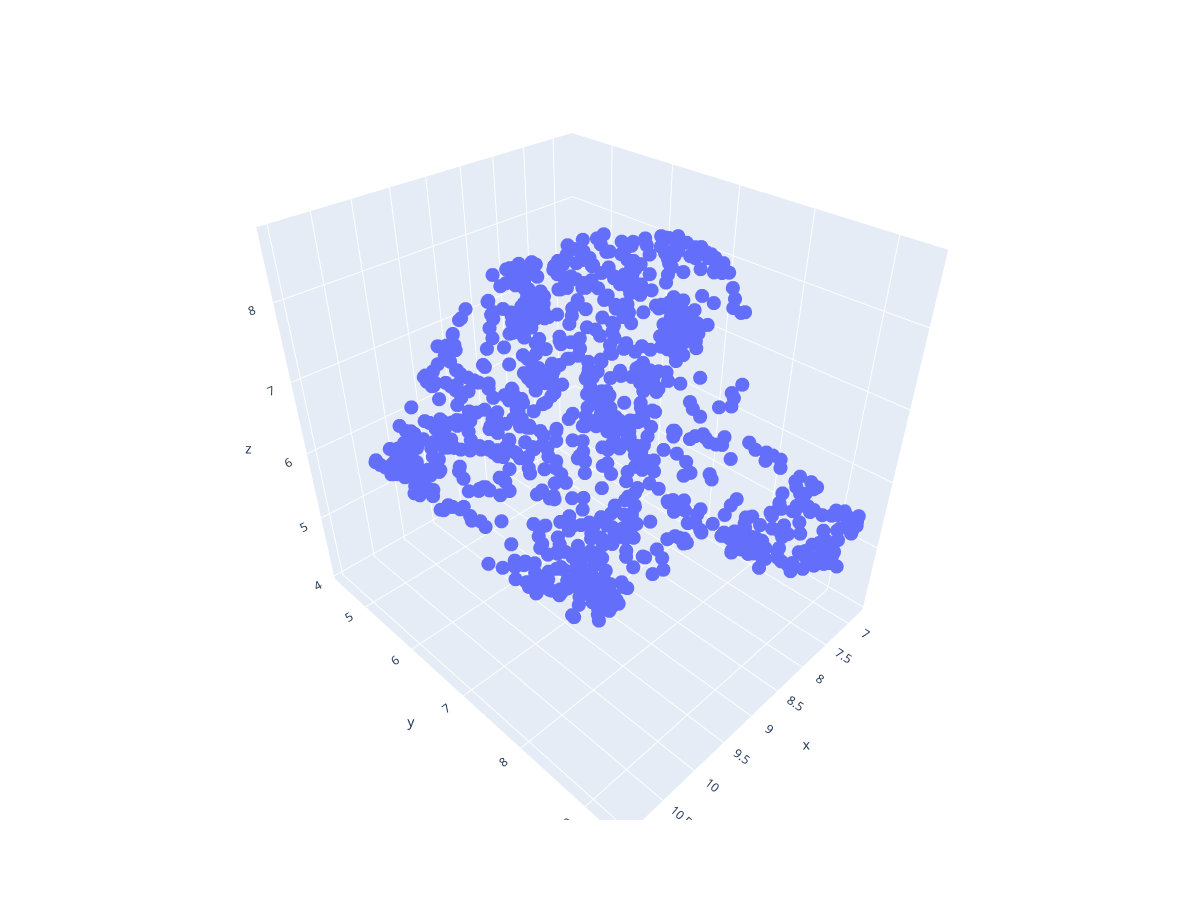

In [26]:
px.scatter_3d(x=standard_embedding[:, 0], y=standard_embedding[:, 1], z=standard_embedding[:, 2], height=900, width=950)

In [10]:
import umap

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)